### 10-30-2020


# TWEETINSIGHTS - PART 2 - EDA

### ALEX MAZZARELLA

### DATA SCIENCE full time course - BrainStation
### CAPSTONE PROJECT

# =============================================================

In this second notebook, we are going to perform some EDA.
First, we will load all the CSV files created during data collection, in one single master dataframe.

In [1]:
# import statements

import pandas as pd
import numpy as np

import random

import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# concatenating all CSV with tweets collected into a master one

csv_path_net = r'net_tweets_pulled'
all_csv_net = glob.glob(os.path.join(csv_path_net, "*.csv"))

my_list_net = []

for filename in all_csv_net:
    df_read = pd.read_csv(filename, index_col=None, header=0)
    my_list_net.append(df_read)

df_master = pd.concat(my_list_net, axis=0, ignore_index=True)

In [3]:
# appending all CSV containing scraped tweets into a single CSV - NETFLIX
df_master.to_csv('master_tweets/raw_netflix/netflix_tweets.csv', index=False)

In [4]:
# load CSV with all tweets scraped into a pandas df
df_raw_net = pd.read_csv('master_tweets/raw_netflix/netflix_tweets.csv')
df_raw_net.head()

,created_at,followers_count,friends_count,handle,hashtags,retweet,symbols,tweet,tweet_id,user_location,user_mentions
0,Sat Sep 26 15:01:29 +0000 2020,327.0,570.0,kaseydrzazga,[],0.0,[],"@Spacefunmars @RyanPGoldchains Ahem, @netflix ...",1.309871e+18,Cleveland,"[{'screen_name': 'Spacefunmars', 'name': 'The ..."
1,Sat Sep 26 15:01:28 +0000 2020,496.0,294.0,PlainPotatoTay,[],0.0,[],@charityfaith @netflix @HunterMarch You gotta ...,1.309871e+18,ALL BLACK LIVES MATTER ✊🏾,"[{'screen_name': 'charityfaith', 'name': 'Char..."
2,Sat Sep 26 15:01:28 +0000 2020,3.0,13.0,dsLdHzRDPbkII4p,[],1.0,[],"Episodes 13 &amp; 14 of ""ARASHI's Diary -Voyag...",1.309871e+18,NaN,"[{'screen_name': 'arashi5official', 'name': 'A..."
3,Sat Sep 26 15:01:24 +0000 2020,1242.0,1095.0,AntonCrace,"[{'text': 'TheShining', 'indices': [26, 37]}, ...",0.0,[],Good news! The version of #TheShining on @netf...,1.309871e+18,Singapore,"[{'screen_name': 'netflix', 'name': 'Netflix',..."
4,Sat Sep 26 15:01:23 +0000 2020,0.0,8.0,Finn91048394,[],0.0,[],@netflix that would be cool if you added shrek,1.309871e+18,NaN,"[{'screen_name': 'netflix', 'name': 'Netflix',..."


Note: the last two cells might also be avoided (by assigning the concatenation of the CSVs directly into df_raw_net).
However, it is in my opinion a good idea to be more explicit (also for future use), as well as to have a master CSV file saved.

In [5]:
# checking size of the raw dataset - NETFLIX
df_raw_net.shape

(61893, 11)

In [6]:
# checking information and data types in the dataset
df_raw_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61893 entries, 0 to 61892
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       61893 non-null  object 
 1   followers_count  61893 non-null  float64
 2   friends_count    61893 non-null  float64
 3   handle           61893 non-null  object 
 4   hashtags         61893 non-null  object 
 5   retweet          61893 non-null  float64
 6   symbols          61893 non-null  object 
 7   tweet            61893 non-null  object 
 8   tweet_id         61893 non-null  float64
 9   user_location    40995 non-null  object 
 10  user_mentions    61893 non-null  object 
dtypes: float64(4), object(7)
memory usage: 5.2+ MB


### Features description.

Here below, I am going to describe what each column of the dataset contains.

* **`created_at`**. Contains date and time at which the tweet was generated. Type: object. No null values.

* **`followers_count`**. The total count of followers for the tweeting user. (Reflects the total count at time and date shown in `created_at`). Type: float64 (int would be more appropriate). No null values.

* **`friends_count`**. The total count of Twitter accounts followed by the user (at the time specified in `created_at`).  Type: float64 (int would be more appropriate). No null values.

* **`handle`**. The public username (it usually appears after the '@'). Type: Object. No null values. 

* **`hashtags`**. For tweets that included hashtags in the text, this column contains a list of dictionaries (one dictionary for each hashtag in the text). The keys are 'text' (the hashtags) and 'indices' (position of hashtags in the tweet text). Type: object. No null values.


* **`retweet`**. Value is 1 for retweets, otherwise 0. Type: float64 (int would be more appropriate). No null values.

* **`symbols`**. Part of the entities that provide metadata and additional contextual information about the tweet. Symbols are usually stock symbols. If symbols were contained in the tweet text, they will be in this column, otherwise we will have an empty list. Type: Object. No null values. Please note, less than 0.002% of the rows have symbols, therefore I might consider dropping the column. 

* **`tweet`**. The actual text of the tweet. Type: object. No null values.

* **`tweet_id`**. The unique identifier of the tweet. Type: float64 (int would be more appropriate). No null values.

* **`user_location`**. The location that the user specified in his profile. Note that this is not verified, hence a user can write the location with no formatting rule and also any other type of text information. Type: object. There are ~21,000 (33%) null values.

* **`user_mentions`** Contains info of other Twitter users mentioned in the tweet text. It is a list of dictionaries, where the keys are  'screen_name', 'name', 'id' (of the user mentioned), 'id_str' (id in string format), 'indices' (position in tweet were the mention appeared). If there were no mention, there will be an empty list. Type: object. No null values.

### Checking duplicates

In [7]:
# duplicated rows
print(f'Current count of duplicated rows: {df_raw_net.duplicated().sum()}')

Current count of duplicated rows: 10188


We won't have use for duplicated rows in our analysis. Let's drop them.

In [8]:
# remove duplicate rows
df_raw_net = df_raw_net.drop_duplicates(keep = 'first')

In [9]:
# checking duplicates - all removed
df_raw_net.duplicated().sum()

0

### Checking null values

In [10]:
df_raw_net.isna().any()

created_at         False
followers_count    False
friends_count      False
handle             False
hashtags           False
retweet            False
symbols            False
tweet              False
tweet_id           False
user_location       True
user_mentions      False
dtype: bool

We have already seen during the features description that we have a high percentage of null values in the 'location' column. Let's look at a random sample of 20 rows.

In [11]:
# sampling 20 random rows of `user_location`
df_raw_net['user_location'].sample(20)

47266            cabin 7, hufflepuff.
4373                        Australia
25396                             NaN
57766                New Delhi, India
54372                 London, England
771      Chilliwack, British Columbia
17529                             NaN
15501                             NaN
12634                      Texas, USA
45386                    South Africa
21183       ÜT: 33.0000,-00.983243434
32452                              UK
32484            Great White North 🇨🇦
24015     Republic of the Philippines
39196                   Massachusetts
36588         Land of Hopes & Dreams!
11934                       Neverland
19163                        Colombia
26983                             NaN
36322                 Los Angeles, CA
Name: user_location, dtype: object

As we can see from the cell above, not all users indicate a location in the location field. At this stage, this column doesn't seem to be reliable for geographical analysis. I am considering dropping the entire column, however I will wait to complete the rest of the cleaning steps, to then check again if we will have a different situation after that.

### Date - time conversion and analysis.

We have some columns that are currently formatted with data types that are not optimal for the info that they actually represent. `followers_count`, `friends_count`, `retweet`, `tweet_id`, are currently float, though they cannot assume decimal values. I will convert them to integer.

`created_at` is currently an object representing date and time at which the tweet was generated, therefore I will convert it to datetime format.



**Converting floats to integers**.

In [12]:
# converting followers count to int32 
df_raw_net.loc[:,'followers_count'] = df_raw_net.loc[:,'followers_count'].astype('int32')

Note: I am using int32 to be mindful of memory. Int32 can store values from -2,147,483,648 to 2,147,483,647. According to [brandwatch](https://www.brandwatch.com/blog/most-twitter-followers/), as of October 1st, 2020, the Twitter account with the highest number of followers is @BarackObama, with ~123 M followers.
So the code should work with int32 for a while. However, if you will be using the code, please feel free to use the data type you find most suitable.

In [13]:
# converting friends count to int32 
df_raw_net.loc[:,'friends_count'] = df_raw_net.loc[:,'friends_count'].astype('int32')

In [14]:
# converting retweet to int8
df_raw_net.loc[:,'retweet'] = df_raw_net.loc[:,'retweet'].astype('int8')

In [15]:
# converting tweet_id to int 
df_raw_net.loc[:,'tweet_id'] = np.int64(df_raw_net['tweet_id'])

In [16]:
# checking all columns converted above
df_raw_net.select_dtypes(include=['int8','int32','int64'])

,followers_count,friends_count,retweet,tweet_id
0,327,570,0,1309870714116337664
1,496,294,0,1309870713441005568
2,3,13,1,1309870711943487488
3,1242,1095,0,1309870693291491328
4,0,8,0,1309870690556878848
...,...,...,...,...
61888,305,292,0,1313059804286517248
61889,427,341,1,1313059586300022784
61890,358,344,1,1313059582449721088
61891,1503,809,1,1313059576305070080


**Converting `created_at` to datetime**.

The column `created_at` is currently an object, containing information on when the tweet was generated. It includes the day of the week, date, time and time zone info. While all these info are useful, they can be better used for analysis purposes if splitted in separate cells.

In [17]:
df_raw_net['created_at'] = pd.to_datetime(df_raw_net['created_at']) 

In [18]:
# creating new column with only date (YYY-MM-DD) of tweet 
df_raw_net['created_date'] = df_raw_net['created_at'].dt.strftime('%Y-%m-%d')

In [19]:
# creating new column with only hour(24) of tweet - we will not need the minutes info for the visualization
df_raw_net['created_hour_of_day'] = df_raw_net['created_at'].dt.strftime('%H')

In [20]:
# # creating new column with only day of week ( 0 = Sunday to 6 = Saturday) of tweet
df_raw_net['created_day_week'] = df_raw_net['created_at'].dt.dayofweek

In [21]:
df_raw_net.head(3).T

,0,1,2
created_at,2020-09-26 15:01:29+00:00,2020-09-26 15:01:28+00:00,2020-09-26 15:01:28+00:00
followers_count,327,496,3
friends_count,570,294,13
handle,kaseydrzazga,PlainPotatoTay,dsLdHzRDPbkII4p
hashtags,[],[],[]
retweet,0,0,1
symbols,[],[],[]
tweet,"@Spacefunmars @RyanPGoldchains Ahem, @netflix ...",@charityfaith @netflix @HunterMarch You gotta ...,"Episodes 13 &amp; 14 of ""ARASHI's Diary -Voyag..."
tweet_id,1309870714116337664,1309870713441005568,1309870711943487488
user_location,Cleveland,ALL BLACK LIVES MATTER ✊🏾,NaN


In [22]:
# check the scraping period (date/time of first and last tweet in the dataset)
df_raw_net.iloc[[0,-1]]['created_at']

0       2020-09-26 15:01:29+00:00
61892   2020-10-05 10:12:31+00:00
Name: created_at, dtype: datetime64[ns, UTC]

One information that could be useful, is to know at which times of the day and week the users are more likely to tweet.
We can plot the tweets counts divided by time of the day/week. However, I see a few challenges in doing so effectively with my current dataset:
* the tweets were not collected continuously over the scraping period (which has we have seen above, was from Sep 26 to Oct 5, 2020). That is, There were time at which I was not able to collect them. To give a relevant representation, I should have run the scraping operation 24/7.
* Just one week of sampling, might not be a relevant representative sample. If I had at least a month of tweets collected, that would have been already more meaningful.
* since it does not seem feasible to assign a location to each user, tweets can come from all parts of the world, on different time zones. If we were to find out that the hours with most tweets are for example during the morning and evening commute, it would be a different time for a user in Mumbai, one in Loondon UK and one in Chicago. Therefore, unless we are able to separate the tweets by location of the user, we would have challenges in representing this classification.

I will then add the code for plotting the count of tweets by hour/day of the week, which could be reused for samples taken over a large period of time. (But please be mindful of the considerations above).

Note: since our period of collection has been 10 days, we will select for the visualizations only tweets from Monday 00:00 to Sunday 23:59.
In this way, every weekday represented will appear in the sample the same number of times.

In [23]:
# selecting monday - sunday
hours_df = df_raw_net[(df_raw_net['created_at']>='2020-09-28 00:00:00+00:00') &
                     (df_raw_net['created_at']<'2020-10-05 00:00:00+00:00')]

In [24]:
# checking dates of first and last tweet
hours_df.iloc[[0,-1]]['created_at']

11792   2020-09-28 00:02:06+00:00
58493   2020-10-04 23:52:46+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [25]:
hours = hours_df.groupby('created_hour_of_day').count().index
count_by_hours = hours_df.groupby('created_hour_of_day').count().values[:,0]


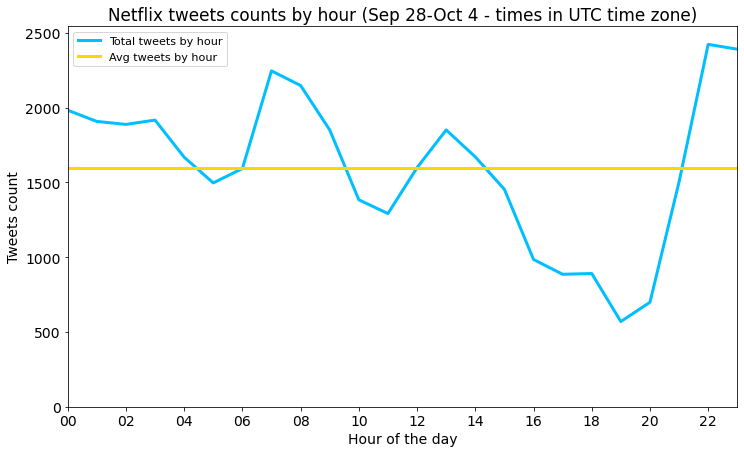

In [26]:
# code to plot tweets counts by hour of the day

# fontsize variable
fsize = 14

plt.figure(figsize=(12,7))
plt.plot(hours, count_by_hours, lw =3, label = 'Total tweets by hour', color = 'deepskyblue')
plt.axhline(count_by_hours.mean(), lw = 3, c = 'gold', label = 'Avg tweets by hour')
plt.ylabel('Tweets count', fontsize = fsize)
plt.xlabel('Hour of the day', fontsize = fsize)
plt.legend(fontsize = fsize*0.8)
plt.title('Netflix tweets counts by hour (Sep 28-Oct 4 - times in UTC time zone)', fontsize = fsize *1.2)
plt.ylim(0, count_by_hours.max()*1.05)
plt.xlim(hours.min(),hours.max())
plt.xticks(range(0,23,2), fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.show()

Anticipated during the considerations above, we can not extract meaningful information from this plot.
However, if for instance we were to assume that most of the tweets were coming from users in USA/Canada (EST time zone), we could have said that the busiest hours are the  evenings (9 pm to 4 am UTC, which would be 5 pm to midnight eastern) and late night (around 7 am UTC, 3 am eastern).

Let's check now for the days of the week. Once again, the considerations done above for the interpretability of the date values, still apply.

In [27]:
# selecting monday - sunday
days_df = df_raw_net[(df_raw_net['created_at']>='2020-09-28 00:00:00+00:00') &
                     (df_raw_net['created_at']<'2020-10-05 00:00:00+00:00')]

In [28]:
days = days_df.groupby('created_day_week').count().index
count_by_days = days_df.groupby('created_day_week').count().values[:,0]

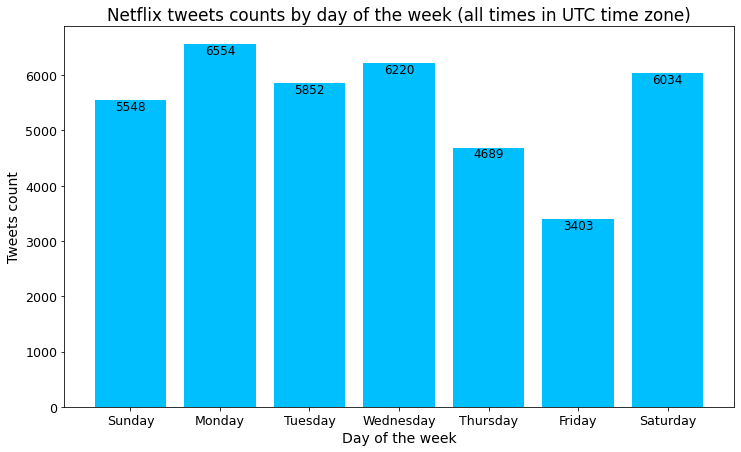

In [29]:
# code to plot tweets counts by hour of the day

# size of font
fsize = 14

plt.figure(figsize=(12,7))
plt.bar(days, count_by_days, color = 'deepskyblue')
plt.ylabel('Tweets count', fontsize = fsize)
plt.xlabel('Day of the week', fontsize = fsize)
plt.title('Netflix tweets counts by day of the week (all times in UTC time zone)', fontsize = fsize*1.2)
plt.xticks(ticks = range(0,7), labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], fontsize = fsize*0.9)
plt.yticks(fontsize = fsize*0.9)
for index, value in enumerate(count_by_days):
    plt.text(index, value, str(value), size = 'large', ha = 'center', va = 'top')

plt.show()

This plot shows that from Saturday to Wednesday, there is no significant change in counts of tweets. A major drop on Fridays, quite surprisingly.

But once again, following the considerations above (different time zones, intermittent data scraping), this plot is not sufficient to confirm that Saturday is the day of the week with most tweets.

For future analysis, we could for example collect tweets only from a specific geographical area (by setting ther geocoordinates and radius in the API request). However, the limit to that might be that we might not get all tweets in that area (remember that it is not mandatory for a user to share their correct location, and a large number seems to not do so). 

### Followers and activity


**Accounts with most followers**.

In [30]:
# selecting the 10 accounts with most followers - (showing avg of followers counts over the scraping period)
most_followed = df_raw_net.groupby('handle').agg({'followers_count': 'mean', 'tweet_id': 'count', 'retweet':'sum'}).sort_values('followers_count', ascending = False).head(10)
most_followed = most_followed.rename(columns = {'followers_count': 'avg_followers_count', 'tweet_id' : 'tweets_count'})
most_followed[['avg_followers_count','retweet']] = most_followed[['avg_followers_count','retweet']].astype(int)
most_followed

,avg_followers_count,tweets_count,retweet
handle,,,
CBSNews,7733241,1,0
EvaLongoria,7048976,1,0
EW,6562964,3,2
the_hindu,6456788,5,5
SkyNews,6399075,1,0
tyleroakley,5695635,1,1
MTVNEWS,5072780,1,0
EconomicTimes,3730188,4,1
goodreads,3695495,1,0


**Most Active accounts**.

To determine which accounts are most actively using the Netflix handle and hashtag, I will create a temporary dataframe named `most_active`. I will group the rows by handle, and calculate the tweet counts, retweets and average total followers (avg over the scraping period).
Because each account have different numbers of followers, it might be interesting to see also a followers to tweet ratio (a tweet from a user account with a higher count of followers, will have a wider reach than one with a lower number of followers).
Note: the `followers_to_tweet_ratio` is calculated using only the tweets in the dataset. Hence, these numbers would certainly be different if we were looking at all the tweets an account tweeted, not only those including our focus search terms.

In [31]:
# grouping accounts (handles) and calculating their tweets count, retweets and followers - (showing count of tweets over the scraping period)
most_active = df_raw_net.groupby('handle').agg({'tweet_id': 'count', 'retweet': 'sum', 'followers_count': 'mean'}).sort_values('tweet_id', ascending = False)
most_active = most_active.rename(columns = {'followers_count': 'avg_followers_count', 'tweet_id' : 'tweets_count'})
most_active[['avg_followers_count','retweet']] = most_active[['avg_followers_count', 'retweet']].astype(int)
most_active['followers_to_tweet_ratio'] = round(most_active['avg_followers_count'] / most_active['tweets_count'],2)
most_active.sort_values(by = 'tweets_count', ascending = False)

,tweets_count,retweet,avg_followers_count,followers_to_tweet_ratio
handle,,,,
pezoutlaw,352,136,13388,38.03
Kada_soulayman,330,0,154,0.47
AmazonRetweet,102,102,398,3.90
save_eyewitness,100,0,34,0.34
theversion,49,26,63388,1293.63
...,...,...,...,...
tpemberton,1,0,1318,1318.00
toydam17,1,1,1599,1599.00
toridanyale,1,1,573,573.00


Some accounts have a very large number of tweets that include our search words. **@pezoutlaw** has tweeted 352 times which is over 30 tweets a day! Also 100 tweets seems a high number for the period considered. Let's have a look at these profiles.

* [@pezoutlaw](https://twitter.com/pezoutlaw) - the tweets seem very repetitive and usually including a link to a blog. I might consider removing the tweets from this account for the topic analysis.

* [@Kada_soulayman](https://twitter.com/Kada_soulayman) this account shows a very large number of tweets all with a very similar text. A 'timestamp' (i.e. It's : 2020-10-11T11:20:15.4149621Z ) and several hashtags, like #merrychristmas, #funny, # netflix, #giveaway, etc. It certainly does not seem that they are tweeting a text about a particular topic, or expressing ideas.

* [@AmazonRetweet](https://twitter.com/AmazonRetweet) - as the name and the retweet count suggests, this account ahas 100% of retweets in our dataset. The account is also suspended as of today ( 2020-10-15 ).

* [@save_eyewitness](https://twitter.com/save_eyewitness) - this account seems to be only posting tweets with messages related to requesting a new season of the crime thriller 'Eyewitness' (the second season was cancelled in 2017).

We have seen that the 4 accounts with the most tweets might not be relevant for our analysis after all. 

They have a very high number of tweets but generally low counts of followers.

Now, let's filter the list for those accounts that tweeted #netflix or @netflix at least 10 times over the data collection period, and have a `followers_to_tweet_ratio` of at least 500.

In [32]:
most_active[(most_active['followers_to_tweet_ratio']>=500) & (most_active['tweets_count']>=10)] #.sort_values(by ='followers_to_tweet_ratio', ascending = False)

,tweets_count,retweet,avg_followers_count,followers_to_tweet_ratio
handle,,,,
theversion,49,26,63388,1293.63
bleedingcool,40,0,81065,2026.62
ComicBook,25,1,216646,8665.84
FilmCompanion,23,0,62915,2735.43
themoviewaffler,21,0,44574,2122.57
Binged_,19,0,17074,898.63
MaryLSchmidt,15,0,16942,1129.47
AuthorMichael57,15,15,7549,503.27
MalliardReport,13,13,81226,6248.15


Let's have a look at some of these accounts:

*  [@theversion](https://twitter.com/theversion) - a streaming content guide based out of UK.

* [@bleedingcool](https://twitter.com/bleedingcool) - an online comics, movies and news content blog.

In general, the accounts in the list above, seem to be online magazines/guides, with a few authors (@MaryLSchmidt and @AuthorMichael57, husband and wife), and some very active individual users (@AaronRFernandes).


It appears then from a first look at the two selections above, that accounts with very frequent tweets including the hashtag and handle Netflix,  and a low number of followers, tend to be spam.
I don't have necessary information to setup a filter for these accounts, and it is not in the scope of the current analysis, but certainly something to keep in mind for the future.

At this point, because we have seen that the tweets from pezoutlaw, Kada_soulayman, AmazonRetweet, save_eyewitness, would have no value for our analysis, I will drop their rows.

Note that they account for 884 tweets, therefore is less than 0.02 % of our total dataset, so I don't expect them to have a large impact on our results either way.

In [33]:
df_raw_net.shape

(51705, 14)

In [34]:
ind_names = df_raw_net[(df_raw_net['handle'] == 'pezoutlaw') | (df_raw_net['handle'] == 'Kada_soulayman') |
           (df_raw_net['handle'] == 'AmazonRetweet') | (df_raw_net['handle'] == 'save_eyewitness')].index

In [35]:
df_raw_net.drop(ind_names , axis = 0, inplace=True)

In [36]:
df_raw_net.shape

(50821, 14)

**Unique accounts**.

In [37]:
unique_accounts = round(df_raw_net['handle'].unique().shape[0] / df_raw_net.shape[0]*100,2)

print(f'{unique_accounts}% of the users in the tweets dataset are unique.')

79.15% of the users in the tweets dataset are unique.


Over 79% of unique users. Although I will not run deeper analysis on them, this sounds promising, as a very low ratio of unique users, over 50,000+ tweets, would raise high suspicions for bots activity.

### Entities: symbols

**Symbols**.

It appears that in a large number of rows, we don't have any symbol (i.e. the content is '[ ]').

In [38]:
# counting rows that have content in the column 'symbol'
n_rows_symbols = df_raw_net[(df_raw_net['symbols']!= '[]')].shape[0]
n_rows_symbols

59

In [39]:
print(f'The amount of tweets containing symbols is {round(n_rows_symbols /df_raw_net.shape[0]*100,2)}%')

The amount of tweets containing symbols is 0.12%


Only 59 out of 50,000+. A very low fraction. In addition to that, the symbol 'NFLX', which is the stock symbol of NETFLIX Inc, seems to be the most frequent.

In [40]:
df_raw_net[(df_raw_net['symbols']!= '[]')].head(5)

,created_at,followers_count,friends_count,handle,hashtags,retweet,symbols,tweet,tweet_id,user_location,user_mentions,created_date,created_hour_of_day,created_day_week
751,2020-09-26 18:02:53+00:00,95,289,YulinFx,"[{'text': 'Netflix', 'indices': [157, 165]}, {...",0,"[{'text': 'NFLX', 'indices': [37, 42]}]",@bro_robz @LoriGreiner @ABCSharkTank $NFLX ral...,1309916365105573888,"Austria(EU), Asia","[{'screen_name': 'bro_robz', 'name': 'Robz 🇲🇾🇯...",2020-09-26,18,5
10222,2020-09-27 20:48:54+00:00,47434,17,techeblog,"[{'text': 'ResidentEvil', 'indices': [0, 13]},...",0,"[{'text': 'NFLX', 'indices': [74, 79]}]",#ResidentEvil is getting its very own CG #Netf...,1310320535109120000,Los Angeles,[],2020-09-27,20,6
10322,2020-09-27 21:01:59+00:00,183,1402,ImJayRodriguez6,"[{'text': 'ResidentEvil', 'indices': [15, 28]}...",1,"[{'text': 'NFLX', 'indices': [89, 94]}]",#ResidentEvil is getting its very own CG #Netf...,1310323824542572288,"Orlando, FL","[{'screen_name': 'techeblog', 'name': 'TechEBl...",2020-09-27,21,6
10324,2020-09-27 21:00:48+00:00,0,13,ewwdadwaddw,"[{'text': 'ResidentEvil', 'indices': [15, 28]}...",1,"[{'text': 'NFLX', 'indices': [89, 94]}]",#ResidentEvil is getting its very own CG #Netf...,1310323527636209664,NaN,"[{'screen_name': 'techeblog', 'name': 'TechEBl...",2020-09-27,21,6
10447,2020-09-27 21:00:48+00:00,0,14,ewwdadwaddw,"[{'text': 'ResidentEvil', 'indices': [15, 28]}...",1,"[{'text': 'NFLX', 'indices': [89, 94]}]",#ResidentEvil is getting its very own CG #Netf...,1310323527636209664,NaN,"[{'screen_name': 'techeblog', 'name': 'TechEBl...",2020-09-27,21,6


Let's count the rows where 'NFLX' does not appear:

In [41]:
no_NFLX = df_raw_net[(df_raw_net['symbols']!= '[]') & (~df_raw_net['symbols'].str.contains('NFLX'))].shape[0]
no_NFLX

19

In [42]:
print(f'The amount of tweets not containing the NFLX symbols is {round(no_NFLX /df_raw_net.shape[0]*100,2)}%')

The amount of tweets not containing the NFLX symbols is 0.04%


Being such a small percentage of values, it will not be relevant for our analysis. I will therefore drop the column.

In [43]:
df_raw_net.drop(columns = 'symbols', axis = 1, inplace = True)

In [44]:
df_raw_net.head(3)

,created_at,followers_count,friends_count,handle,hashtags,retweet,tweet,tweet_id,user_location,user_mentions,created_date,created_hour_of_day,created_day_week
0,2020-09-26 15:01:29+00:00,327,570,kaseydrzazga,[],0,"@Spacefunmars @RyanPGoldchains Ahem, @netflix ...",1309870714116337664,Cleveland,"[{'screen_name': 'Spacefunmars', 'name': 'The ...",2020-09-26,15,5
1,2020-09-26 15:01:28+00:00,496,294,PlainPotatoTay,[],0,@charityfaith @netflix @HunterMarch You gotta ...,1309870713441005568,ALL BLACK LIVES MATTER ✊🏾,"[{'screen_name': 'charityfaith', 'name': 'Char...",2020-09-26,15,5
2,2020-09-26 15:01:28+00:00,3,13,dsLdHzRDPbkII4p,[],1,"Episodes 13 &amp; 14 of ""ARASHI's Diary -Voyag...",1309870711943487488,NaN,"[{'screen_name': 'arashi5official', 'name': 'A...",2020-09-26,15,5


### RETWEET

**Checking percentage of `retweet`**.

In [45]:
print(f'The percentage of retweets is {round(df_raw_net["retweet"].mean()*100,2)}%')

The percentage of retweets is 57.66%


Over 57% of our rows are related to retweets. While 'retweeting' can have good marketing reasons (discussing them is not in the scope of this project), for our analysis a high number of retweet can bring some challenges.

Before fitting most NLP ML model, we will have to perform a vectorization of all the text data (in our case the text of the tweets). Thus, as the exact same text of a given tweet (document) gets repeated multiple times, the ML model will interpret the words (tokens) as being more frequent and relevant than they actually are. I won't go too much in detail at this stage, but we will get back at this later during the analysis.

Let's have a quick look at the metrics of the retweets.

In [46]:
# selecting tweets and their retweet sums in a temporary dataframe - excluding retweets with count

# group by same tweet text and copy in new temporary df
df_retweet = df_raw_net.groupby('tweet').agg({'retweet': 'sum'}).sort_values(by='retweet', ascending = False)

# remove the rows that are NOT retweets (retweet sum < 1)
df_retweet = df_retweet[df_retweet['retweet']>=1]


# rename retweet count column for more understandable visualization
df_retweet.rename(columns ={'retweet': 'retweet_count'}, inplace = True)
df_retweet['retweet_count'] = df_retweet['retweet_count'].astype('int16')
df_retweet.head(10)

,retweet_count
tweet,
"Episodes 13 &amp; 14 of ""ARASHI's Diary -Voyage-"" are out now! Enjoy these next chapters in ARASHI's diary! Only on @netflix \n#嵐 #ARASHI https://t.co/2qPByTneRE",1675
Thank you again to all our amazing fans for making #Ratched the most watched television show on #Netflix WORLDWIDE for one week and counting! #ratchedweekend 💚🍑 🌎🌍🌏 https://t.co/bPCjEBMaEm,639
Today in Hawkins... https://t.co/WU1I4p5cZK,622
"The Mother of the Blues is coming to @Netflix in Ma Rainey’s Black Bottom, based on the play by August Wilson and directed by George C. Wolfe. Watch it December 18. @MaRaineyFilm \nhttps://t.co/QD0QzO5gFi https://t.co/sMHd18ovbE",602
Mildred THEE Ratched https://t.co/7elsfGWwaL,601
"Viola Davis and Chadwick Boseman star in Ma Rainey's Black Bottom, a new film based on August Wilson’s award-winning play from director George C. Wolfe and producer Denzel Washington. \n\n@MaRaineyFilm premieres December 18. https://t.co/ErhrQAW4nU",459
"The authorities will sort out of @realDonaldTrump taxes. Also note: In 2018, @netflix reported $856 million in income; paid no federal taxes; and inked a deal with @BarackObama and @MichelleObama reportedly worth $50 million. Was that a taxpayer subsidy?",395
Report: #Netflix loses 2.5 million subscribers because of movie #Cuties - Netflix Political Cuties- Throwback #BenGarrison cartoon for your #sundayvibes https://t.co/hxQ6yotFte https://t.co/J8tw5O9kkc,312
"And obviously Adora said ""YES"" so...💍♥\n\nHope you like,\nVago\n#SheraandthePrincessesofPower #spopfanart #SPop #shera #catra #catradoda #catradorafanart #adora #netflix #dreamworks #drawing #SheRaMovie #sherafanart #fanart #wedding #LGBTQ #vago_art #digitaldrawing #webcomic https://t.co/CGOqjRi3L7",306


We can see that the post with the highest retweet count, has a value of 1,675 - but that number drops quickly.
Let's check other metrics before further considerations.

In [47]:
df_retweet.shape

(6447, 1)

In [48]:
df_retweet.describe().T

,count,mean,std,min,25%,50%,75%,max
retweet_count,6447.0,4.54537,30.065784,1.0,1.0,1.0,2.0,1675.0


In [49]:
quant_95 = int(df_retweet.quantile(0.95))
quant_90 = int(df_retweet.quantile(0.90))
quant_80 = int(df_retweet.quantile(0.80))

print(f'80% of the retweets have a retweet count of {quant_80} or less')
print(f'90% of the retweets have a retweet count of {quant_90} or less')
print(f'95% of the retweets have a retweet count of {quant_95} or less')

80% of the retweets have a retweet count of 3 or less
90% of the retweets have a retweet count of 6 or less
95% of the retweets have a retweet count of 11 or less


* We have seen that 6,447 unique tweets (text) are retweets and they account for ~57% (29,304) of the rows in our dataset.
* 95% of the retweet appear 11 time or less in our dataset and at least 50% of the retweet appear only once.

NOTE: if a retweet has a count of 1, it might be either that we have a single tweet with a single retweet, or only the retweet. 
The latter might be the case in which only the retweet has been collected, but not the original tweet.
For example, we have already calculated that ~57% of our rows are retweet (29,304). But some of them might appear only once in our dataset.

In [50]:
# check total numbers of tweets (0) and retweets (1)
df_raw_net['retweet'].value_counts()

1    29304
0    21517
Name: retweet, dtype: int64

In [51]:
# check total number of unique tweets in our dataset
df_raw_net['tweet'].nunique()

25230

As the counts above are showing, we have more than 3,500 unique tweets that are actually retweets.

**Keeping or dropping retweets?**

A this point, it might be worth considering that, if a user is retweeting one particular tweet, they might share a similar idea that was expressed in the original tweet. Therefore, if we are analyzing the sentiment of users towards the brand, it might be worth considering not disposing of the retweet (those that contain text already present in the dataset).
But it is also true that retweeting takes a smaller 'effort' than tweeting.

Being still at a relatively green stage of my Data Science journey, I will have a more conservative approach and perform the analysis without duplicated text documents (tweets).
But please, send me a message via linkedin ( [click here](https://www.linkedin.com/in/alex-mazzarella-yvr/) ) with your comments/opinion on it.



**Dropping duplicated tweets**

First, I will drop the columns used for the date - time analysis above, as they are not required anymore for the next steps of our analysis. I will keep the original `created_at`.

In [52]:
df_raw_net = df_raw_net.drop(['created_date', 'created_hour_of_day', 'created_day_week'], axis = 1)

In [53]:
df_net = df_raw_net.copy()

In [54]:
df_net.shape

(50821, 10)

In [55]:
# removing all duplicated tweets -  - NETFLIX
df_net = df_net[df_net['tweet'].duplicated() == False]

In [56]:
# resetting index count
df_net.reset_index(drop = True, inplace = True)

In [57]:
#checking that we have no more duplicated tweets
df_net[df_net['tweet'].duplicated() == True].shape[0]

0

In [58]:
# checking new size of dataset with no duplicated tweets
df_net.shape

(25230, 10)

One additional check before we move forward.

The text of a retweet, is composed of the original tweet text, with the string 'RT ' added at the start of it.
For example, the retweet of 'This was the best movie ever' would be 'RT This was the best movie ever'.
This is done indeed to distinguish the retweets from tweets.

To be in line with what we discussed so far, when we will do our next analysis we don't want to have two almost exactly equal documents, only differing in the initial 'RT '.

So let's check that this is not happening.

In [59]:
# checking if there is any document that has a duplicated with the 'RT ' stamp at the begin
df_net[df_net['tweet'] == ('RT ' + df_net['tweet'])]

,created_at,followers_count,friends_count,handle,hashtags,retweet,tweet,tweet_id,user_location,user_mentions


No lines returned, seems like we can move forward.

Before saving the clean dataset to csv, I will do one last check at the location columns, to see if after removing all the rows above, the situation has improved.

In [60]:
# sampling 20 rows for location - try running this cell multiple times to observe different results
df_net['user_location'].sample(20)

5278                            Nigeria
13307                     International
16196                               NaN
16502                               NaN
11095                               NaN
16990                               NaN
14673                   London, England
23670                               NaN
22003              Northen Westeros....
5743     Raccoon City-before the traged
12904                               NaN
742                    Indianapolis, IN
14132            Former Chequersolvacia
8396                         Manchester
13627                   California, USA
14651                               NaN
11239                        Temple, TX
24351                       los angeles
1809                      Los Gatos, CA
2531                          Cebu City
Name: user_location, dtype: object

The quality of content for this column has not improved, therefore I go ahead and drop it.

In [61]:
# dropping location column from new "clean" dataset
df_net.drop( 'user_location', axis = 1, inplace = True)

In [62]:
df_net.shape

(25230, 9)

In [63]:
# saving to csv a copy of the dataset with retweets
df_net.to_csv('master_tweets/clean_netflix/clean_netflix.csv', index = False)

I will also save a copy of the dataset with retweets for future additional exploration.

In [64]:
# dropping location column from dataset (with retweets)
df_raw_net.drop( 'user_location', axis = 1, inplace = True)

In [65]:
df_raw_net.shape

(50821, 9)

In [66]:
# saving to csv a copy of the dataset with retweets
df_raw_net.to_csv('master_tweets/clean_netflix/w_retweet_netflix.csv', index = False)

In the next notebooks, we will proceed with sentiment analysis and topic axtraction.